In [24]:

# import neccesry packges
import numpy as np 
from matplotlib import pyplot as plt 
from PIL import Image 
from math import sqrt

In [25]:
def is_onboard( position , map ):
    if((position[0] >= 0 and position[1] >= 0) and position[0]<len(map) and position[1]<len(map)):
        return True        
    else:
        return False   
    
def is_not_obstacle( position , map): # Checks a Position is obstacle or Not
    if(map[position] == 1):
        return False
    return True

def isValid( position , map): 
    if is_onboard(position , map ) and map[position] != 1 and  map[position] == 0 :
        return True
    return False

def get_distance(post1 , post2): # returns a distance based the connectivity we select 
    distance =  sqrt((post1[0] - post2[0])**2 + (post1[1] -post2[1])**2)
    return distance
        
def getX(path):# returns the row part of two dimensional array 
    x=[]       # we use this to draw path in a map
    for p in path:
        i,j = p
        x.append(i) 
    return x 
def getY(path):  # returns the colomun part of two dimensional array 
    y=[]         # we use this to draw path in a map
    for p in path:
        i,j = p
        y.append(j)
    return y


In [39]:
def A_Star(start,goal,map):

    motions = [(0,-1),(-1, 0),(0, 1),(1, 0),(1,1),(-1,-1),(1,-1),(-1,1) ] # 8-point connectivity 
    #initialization
    h_start = get_distance(start, goal) # huristic distnce the start node 
    g_distance = { start: 0 }  # distance from the start point to the child node
    f_distance = {start:h_start} # total distance calculated 
    open_list =  {start : h_start }
    closed_list = {start:0}
    parent_list = { start : start }
    
    
    # do until the closed list is empty
    while  len(open_list): 
        current_position = list(open_list)[0]   # get the first node from the listed o-list 
        open_list.pop(current_position) # remove from the sorted openlist 
        closed_list[current_position] = parent_list[current_position]   # add to the closed-list the one in the top of the open list
        # found the goal
        if(current_position == goal): # if goal is found return 
            print("goal found",current_position)
            break
                
        np.random.shuffle(motions)  
        # look for the children node      
        for m in motions:  
            successor_position = (current_position[0]+m[0] , current_position[1]+m[1])
            g = g_distance[current_position] + get_distance(successor_position,current_position)
            h = get_distance(successor_position, goal) # get the huristic distnace from the child node to the goal 
            f = g + h   
            
            if(isValid(successor_position, grid_map)): 
                if(open_list.get(successor_position) and open_list.get(successor_position) < f ):
                    # if node is already in the open list with small distance ignore it
                    continue
                if(closed_list.get(successor_position) ):
                    # if node is already in the closed list ignore it
                    continue 
                else:     
                    ## update the closed and open list              
                    g_distance[successor_position] = g
                    f_distance[successor_position] = f
                    open_list[successor_position] = f
                    parent_list[successor_position] = current_position
                    
        open_list = dict(sorted(open_list.items(), key=lambda open_list: open_list[1])) # sort open postion by thier value        
       
       
    ## Searching the path from start to the goal using closed list    
    path = [goal]
    curre_node = goal
    while curre_node != start:
        curre_node = closed_list[curre_node]
        path.append(curre_node)
    path = path[::-1]
    
    return path,f_distance[goal]


goal found (90, 70)
path_distance: 133.5807358037434
path: [(10, 10), (10, 11), (10, 12), (10, 13), (10, 14), (10, 15), (10, 16), (10, 17), (10, 18), (10, 19), (10, 20), (10, 21), (10, 22), (10, 23), (10, 24), (10, 25), (10, 26), (10, 27), (10, 28), (10, 29), (10, 30), (10, 31), (10, 32), (11, 33), (12, 34), (13, 35), (14, 36), (15, 37), (16, 38), (17, 39), (18, 40), (19, 41), (20, 42), (21, 43), (22, 44), (23, 45), (24, 46), (25, 47), (26, 48), (27, 49), (28, 50), (29, 51), (30, 52), (31, 53), (32, 54), (33, 55), (34, 56), (35, 57), (36, 58), (37, 59), (38, 60), (39, 61), (40, 62), (41, 63), (42, 64), (43, 65), (44, 66), (45, 67), (46, 68), (47, 69), (48, 70), (49, 71), (50, 72), (51, 73), (52, 74), (53, 75), (54, 76), (55, 77), (56, 78), (57, 79), (58, 80), (59, 81), (60, 82), (61, 83), (62, 84), (63, 85), (64, 86), (65, 87), (66, 87), (67, 87), (68, 87), (69, 87), (70, 87), (71, 87), (72, 87), (73, 87), (74, 87), (75, 87), (76, 87), (77, 86), (78, 85), (79, 84), (80, 83), (81, 82), 

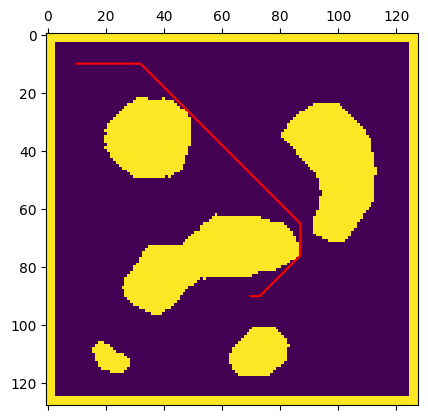

In [47]:
def main():
    
    # Load grid map 
    image = Image.open('map0.png').convert('L')
    grid_map = np.array(image.getdata()).reshape(image.size[0], image.size[1])/255 
    # binarize the image 
    grid_map[grid_map > 0.5] = 1
    grid_map[grid_map <= 0.5] = 0 
    # Invert colors to make 0 -> free and 1 -> occupied 
    grid_map = (grid_map * -1) + 1 # Show grid map 
    start = (10,10)
    goal = (90,70)
    path,path_distance = A_Star(start,goal,grid_map)

    print("path_distance:",path_distance)
    print("path:",path)
    plt.matshow(grid_map) 
    plt.plot(getY(path),getX(path),color='red')
    plt.show()
main()